# Задание лабораторной работы

- Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - масштабирование признаков (не менее чем тремя способами);
  - обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
  - обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
  - отбор признаков:
    - один метод из группы методов фильтрации (filter methods);
    - один метод из группы методов обертывания (wrapper methods);
    - один метод из группы методов вложений (embedded methods).

# Выполнение работы

## Текстовое описание датасета

В качестве данных для анализа используется датасет `LifeExpectancy.csv`.

Для анализа в ЛР используются не все признаки.

## Импорт библиотек

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats


## Подключение Google Диска для работы с Google Colab

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Чтение данных

In [222]:
data = pd.read_csv('/content/drive/MyDrive/LifeExpectancy.csv', encoding='unicode_escape')

In [223]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [224]:
data.shape

(2928, 22)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [226]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Первичная обработка данных

Оставим в исходной выборке лишь некоторые признаки:

In [227]:
data.drop(['Year', ' BMI ', 'Measles ', 'under-five deaths ', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'], inplace=True, axis=1)

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2928 non-null   object 
 1   Status                  2928 non-null   object 
 2   Life expectancy         2928 non-null   float64
 3   Adult Mortality         2928 non-null   int64  
 4   infant deaths           2928 non-null   int64  
 5   Alcohol                 2735 non-null   float64
 6   percentage expenditure  2928 non-null   float64
 7   Hepatitis B             2375 non-null   float64
 8   Polio                   2909 non-null   float64
 9   Total expenditure       2702 non-null   float64
 10  GDP                     2485 non-null   float64
 11  Population              2284 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 274.6+ KB


Удалим пропуски:

In [229]:
for column in data.columns:
  if (data[column].isnull().sum() != 0):
    print(column,':',data[column].isnull().sum())

Alcohol : 193
Hepatitis B : 553
Polio : 19
Total expenditure : 226
GDP : 443
Population : 644


In [230]:
data = data.dropna()

In [231]:
for column in data.columns:
  if (data[column].isnull().sum() != 0):
    print(column,':',data[column].isnull().sum())

Приведем бинарные свойства к int64:

In [232]:
data['Status'] = data['Status'].apply(lambda x: x == 'Developed').astype('int64')

Закодируем признаки:

LabelEncoder

In [233]:
from sklearn.preprocessing import LabelEncoder

In [234]:
letype = LabelEncoder()
learrtype = letype.fit_transform(data["Country"])
data["Country"] = learrtype
data = data.astype({"Country":"int64"})

CountEncoder

In [235]:
!pip install category_encoders

In [236]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [237]:
data['Population'] = data['Population'].apply(lambda x: f'{x}chel')

In [238]:
ce_CountEncoder1 = ce_CountEncoder()
data["Population"] = ce_CountEncoder1.fit_transform(data['Population'])

FrequencyEncoder

In [239]:
data['Life expectancy'] = data['Life expectancy'].apply(lambda x: f'{x}years')

In [240]:
ce_CountEncoder3 = ce_CountEncoder(normalize=True)
data["Life expectancy"] = ce_CountEncoder3.fit_transform(data['Life expectancy'])

In [241]:
float_values = ['Country', 'Life expectancy', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Polio', 'Total expenditure', 'GDP', 'Population']
for col in float_values:
    data[col] = data[col] * 1000
    data[col] = data[col].astype('int64')
    print(col, data[col].unique())

Country [     0   1000   2000   3000   4000   5000   6000   7000   8000   9000
  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000
  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000
  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000
  40000  41000  42000  43000  44000  45000  46000  47000  48000  49000
  50000  51000  52000  53000  54000  55000  56000  57000  58000  59000
  60000  61000  62000  63000  64000  65000  66000  67000  68000  69000
  70000  71000  72000  73000  74000  75000  76000  77000  78000  79000
  80000  81000  82000  83000  84000  85000  86000  87000  88000  89000
  90000  91000  92000  93000  94000  95000  96000  97000  98000  99000
 100000 101000 102000 103000 104000 105000 106000 107000 108000 109000
 110000 111000 112000 113000 114000 115000 116000 117000 118000 119000
 120000 121000 122000 123000 124000 125000 126000 127000 128000 129000
 130000 131000 132000 133000]
Life expectancy [ 6  3  1  4  2  5  8  

In [242]:
data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
0,0,0,6,263000,62,10,71279,65000,6000,8160,584259,1000
1,0,0,3,271000,64,10,73523,62000,58000,8180,612696,1000
2,0,0,3,268000,66,10,73219,64000,62000,8130,631744,1000
3,0,0,1,272000,69,10,78184,67000,67000,8520,669959,1000
4,0,0,4,275000,71,10,7097,68000,68000,7870,63537,1000


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, 0 to 2927
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Country                 1659 non-null   int64
 1   Status                  1659 non-null   int64
 2   Life expectancy         1659 non-null   int64
 3   Adult Mortality         1659 non-null   int64
 4   infant deaths           1659 non-null   int64
 5   Alcohol                 1659 non-null   int64
 6   percentage expenditure  1659 non-null   int64
 7   Hepatitis B             1659 non-null   int64
 8   Polio                   1659 non-null   int64
 9   Total expenditure       1659 non-null   int64
 10  GDP                     1659 non-null   int64
 11  Population              1659 non-null   int64
dtypes: int64(12)
memory usage: 168.5 KB


## Разделение выборки

In [244]:
data.describe()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1.659000e+03,1659.000000,1659.000000,1659.000000,1.659000e+03,1659.000000
mean,66623.869801,0.145871,4.657625,168539.481615,32.734780,4513.931284,6.956040e+05,79163.954189,83534.659433,5962.045208,5.541147e+06,1002.411091
std,39160.608445,0.353083,3.599988,125106.473746,120.504952,4025.212619,1.754461e+06,25638.897767,22463.437081,2299.126879,1.144576e+07,49.058418
min,0.000000,0.000000,0.000000,1000.000000,0.000000,10.000000,0.000000e+00,2000.000000,3000.000000,740.000000,1.681000e+03,1000.000000
25%,33000.000000,0.000000,2.000000,77000.000000,1.000000,810.000000,3.770600e+04,74000.000000,81000.000000,4410.000000,4.640180e+05,1000.000000
50%,67000.000000,0.000000,4.000000,149000.000000,3.000000,3750.000000,1.451020e+05,89000.000000,93000.000000,5840.000000,1.589827e+06,1000.000000
75%,100000.000000,0.000000,6.000000,228500.000000,23.000000,7325.000000,5.086470e+05,96000.000000,97000.000000,7485.000000,4.705360e+06,1000.000000
max,133000.000000,1.000000,21.000000,723000.000000,1600.000000,17870.000000,1.896135e+07,99000.000000,99000.000000,14390.000000,1.191727e+08,2000.000000


В качестве целевого признака возьмем признак `price`.

In [245]:
# DataFrame не содержащий целевой признак
Y = data['Life expectancy']
X_ALL = data.drop('Life expectancy', axis=1)

In [246]:
X_ALL

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
0,0,0,263000,62,10,71279,65000,6000,8160,584259,1000
1,0,0,271000,64,10,73523,62000,58000,8180,612696,1000
2,0,0,268000,66,10,73219,64000,62000,8130,631744,1000
3,0,0,272000,69,10,78184,67000,67000,8520,669959,1000
4,0,0,275000,71,10,7097,68000,68000,7870,63537,1000
...,...,...,...,...,...,...,...,...,...,...,...
2923,133000,0,723000,27,4360,0,68000,67000,7130,454366,1000
2924,133000,0,715000,26,4059,0,7000,7000,6520,453351,1000
2925,133000,0,73000,25,4430,0,73000,73000,6530,57348,1000
2926,133000,0,686000,25,1720,0,76000,76000,6160,548587,1000


In [247]:
Y

0       6
1       3
2       3
3       1
4       4
       ..
2923    0
2924    1
2925    1
2926    1
2927    2
Name: Life expectancy, Length: 1659, dtype: int64

In [248]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [249]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Life expectancy'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((1327, 11), (332, 11))

## Масштабирование признаков

### Масштабирование на основе Z-оценки

In [250]:
x_col_list = ['Country', 'Adult Mortality', 'Population']

In [251]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
0,-1.701811,-0.413259,0.755269,0.242928,-1.119267,-0.355957,-0.552607,-3.452635,0.956284,-0.433207,-0.049162
1,-1.701811,-0.413259,0.819233,0.259530,-1.119267,-0.354678,-0.669652,-1.137064,0.964985,-0.430722,-0.049162
2,-1.701811,-0.413259,0.795247,0.276132,-1.119267,-0.354851,-0.591622,-0.958943,0.943231,-0.429057,-0.049162
3,-1.701811,-0.413259,0.827229,0.301035,-1.119267,-0.352020,-0.474577,-0.736292,1.112912,-0.425717,-0.049162
4,-1.701811,-0.413259,0.851216,0.317636,-1.119267,-0.392550,-0.435562,-0.691762,0.830111,-0.478715,-0.049162
...,...,...,...,...,...,...,...,...,...,...,...
1654,1.695483,-0.413259,4.433245,-0.047604,-0.038253,-0.396597,-0.435562,-0.736292,0.508152,-0.444559,-0.049162
1655,1.695483,-0.413259,4.369281,-0.055905,-0.113055,-0.396597,-2.815476,-3.408104,0.242754,-0.444648,-0.049162
1656,1.695483,-0.413259,-0.763896,-0.064206,-0.020858,-0.396597,-0.240487,-0.469111,0.247105,-0.479256,-0.049162
1657,1.695483,-0.413259,4.137408,-0.064206,-0.694317,-0.396597,-0.123442,-0.335520,0.086126,-0.436324,-0.049162


In [252]:
data_cs11_scaled.describe()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
count,1659.000000,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1659.000000,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03
mean,0.000000,1.713183e-17,-1.199228e-16,2.998071e-17,-1.713183e-17,0.000000,-1.049325e-16,1.124276e-16,2.890997e-17,-1.713183e-17,-1.948746e-16
std,1.000302,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00
min,-1.701811,-4.132594e-01,-1.339579e+00,-2.717287e-01,-1.119267e+00,-0.396597,-3.010551e+00,-3.586225e+00,-2.272002e+00,-4.841213e-01,-4.916216e-02
25%,-0.858873,-4.132594e-01,-7.319132e-01,-2.634278e-01,-9.204602e-01,-0.375099,-2.014717e-01,-1.128689e-01,-6.752621e-01,-4.437153e-01,-4.916216e-02
50%,0.009608,-4.132594e-01,-1.562299e-01,-2.468259e-01,-1.898438e-01,-0.313867,3.837533e-01,4.214936e-01,-5.309929e-02,-3.453253e-01,-4.916216e-02
75%,0.852545,-4.132594e-01,4.794204e-01,-8.080759e-02,6.985758e-01,-0.106593,6.568583e-01,5.996144e-01,6.626054e-01,-7.304356e-02,-4.916216e-02
max,1.695483,2.419788e+00,4.433245e+00,1.300974e+01,3.319103e+00,10.414166,7.739033e-01,6.886748e-01,3.666825e+00,9.930826e+00,2.034085e+01


Построим плотность распределения:

In [253]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

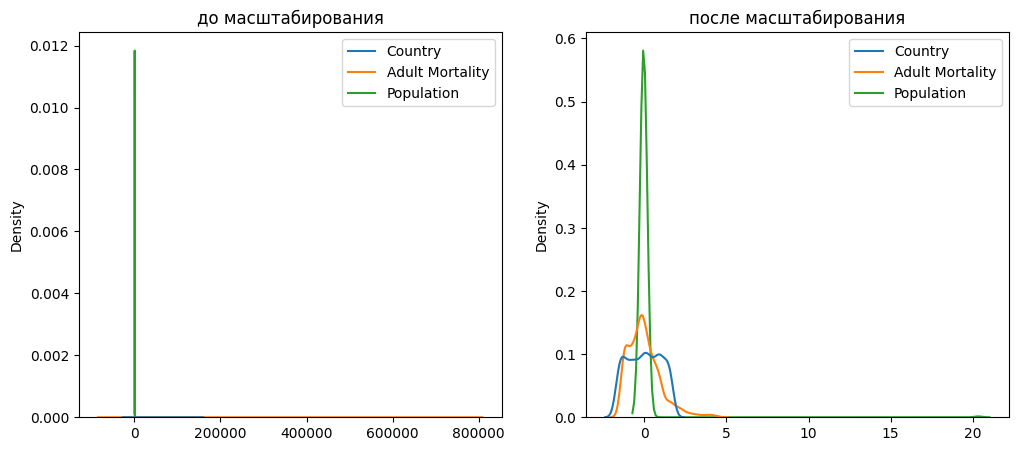

In [254]:
draw_kde(x_col_list, data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

Обучаем StandardScaler на обучающей выборке и масштабируем обучающую и тестовую выборки:

In [255]:
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [256]:
data_cs12_scaled_train.describe()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
count,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03
mean,-3.480428e-17,-2.944977e-17,1.204763e-16,-1.874077e-17,-5.220642e-17,-4.015878e-17,2.382754e-16,-4.283604e-17,-7.362444e-17,8.031757e-18,-4.497784e-16
std,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00
min,-1.706789e+00,-4.100412e-01,-1.359299e+00,-2.693859e-01,-1.106328e+00,-3.972373e-01,-3.018098e+00,-3.655962e+00,-2.244123e+00,-4.863351e-01,-4.760106e-02
25%,-8.631901e-01,-4.100412e-01,-7.410782e-01,-2.607726e-01,-9.327080e-01,-3.763189e-01,-1.717433e-01,-1.310444e-01,-6.723480e-01,-4.460277e-01,-4.760106e-02
50%,5.971901e-03,-4.100412e-01,-1.553951e-01,-2.435462e-01,-2.035024e-01,-3.152797e-01,4.521154e-01,4.112506e-01,-3.842779e-02,-3.514985e-01,-4.760106e-02
75%,8.495703e-01,-4.100412e-01,4.953639e-01,-7.989473e-02,6.918828e-01,-1.052902e-01,6.470712e-01,5.920157e-01,6.649632e-01,-5.996756e-02,-4.760106e-02
max,1.693169e+00,2.438779e+00,4.513801e+00,1.351179e+01,3.323472e+00,1.042325e+01,7.640447e-01,6.823982e-01,3.682597e+00,9.711804e+00,2.100794e+01


In [257]:
data_cs12_scaled_test.describe()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,-0.018206,0.027579,0.017732,0.062794,0.053856,-0.001419,-0.046901,-0.082450,0.116165,0.006709,0.015819
std,1.005294,1.028775,1.085543,1.176481,0.990634,1.006000,0.997565,1.071205,0.985789,1.041261,1.155573
min,-1.706789,-0.410041,-1.359299,-0.269386,-1.106328,-0.397181,-3.018098,-3.520389,-2.235439,-0.486686,-0.047601
25%,-0.895145,-0.410041,-0.743112,-0.260773,-0.839077,-0.372494,-0.288717,-0.277916,-0.536663,-0.444868,-0.047601
50%,-0.019592,-0.410041,-0.147261,-0.243546,-0.100570,-0.311235,0.374133,0.343464,0.009333,-0.325211,-0.047601
75%,0.855961,-0.410041,0.456725,-0.054055,0.766292,-0.115907,0.647071,0.592016,0.764827,-0.096639,-0.047601
max,1.693169,2.438779,4.464994,11.789142,2.604187,8.878934,0.764045,0.682398,3.396030,10.012329,21.007935


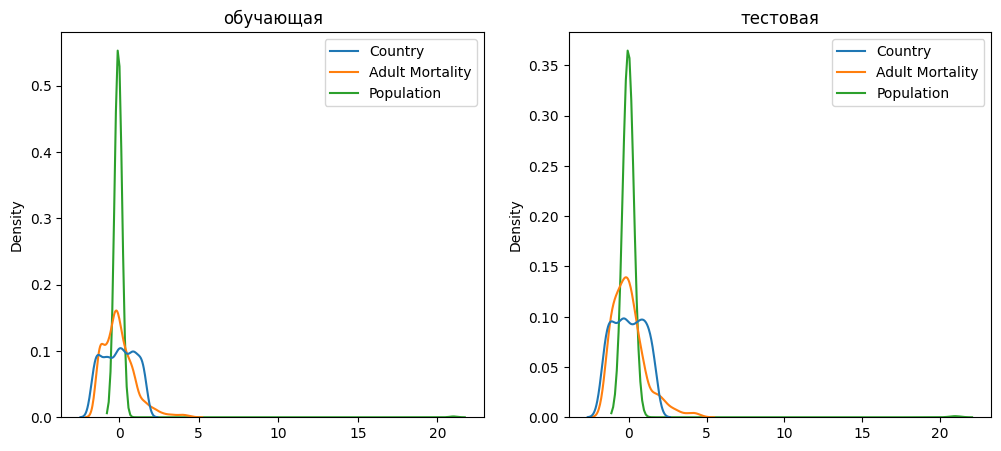

In [258]:
draw_kde(x_col_list, data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Масштабирование Mean Normalization

In [259]:
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [260]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,-0.001072,0.001937,0.000604,0.000912,0.002433,-0.000026,-0.002482,-0.003803,0.003922,0.000132,0.000150
std,0.294441,0.353083,0.173278,0.075316,0.225376,0.092528,0.264319,0.233994,0.168434,0.098878,0.049058
min,-0.502003,-0.143934,-0.231445,-0.019547,-0.249747,-0.036712,-0.797986,-0.842706,-0.378645,-0.047723,-0.002261
25%,-0.253883,-0.143934,-0.126182,-0.018922,-0.204954,-0.034723,-0.055718,-0.030206,-0.109781,-0.043729,-0.002261
50%,0.001756,-0.143934,-0.026459,-0.017672,-0.040340,-0.029059,0.098921,0.094794,-0.005019,-0.034003,-0.002261
75%,0.249877,-0.143934,0.083652,-0.005172,0.159828,-0.009886,0.171086,0.136461,0.115494,-0.007089,-0.002261
max,0.497997,0.856066,0.768555,0.980453,0.750253,0.963288,0.202014,0.157294,0.621355,0.981780,0.997739


In [261]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [262]:
data_cs22_scaled_train.describe()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
count,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03,1.327000e+03
mean,-1.740214e-17,-2.175267e-17,2.225466e-17,-1.673283e-18,-1.472489e-17,-4.015878e-18,6.241344e-17,-9.705039e-18,-1.171298e-17,3.346565e-19,-2.200367e-17
std,2.942322e-01,3.511548e-01,1.703320e-01,7.259011e-02,2.258289e-01,9.245215e-02,2.645000e-01,2.305887e-01,1.687910e-01,9.809407e-02,4.751135e-02
min,-5.020029e-01,-1.439337e-01,-2.314449e-01,-1.954738e-02,-2.497468e-01,-3.671160e-02,-7.979863e-01,-8.427060e-01,-3.786450e-01,-4.768861e-02,-2.260739e-03
25%,-2.538826e-01,-1.439337e-01,-1.261818e-01,-1.892238e-02,-2.105531e-01,-3.477838e-02,-4.540899e-02,-3.020598e-02,-1.134435e-01,-4.373619e-02,-2.260739e-03
50%,1.756464e-03,-1.439337e-01,-2.645878e-02,-1.767238e-02,-4.593940e-02,-2.913730e-02,1.195395e-01,9.479402e-02,-6.483820e-03,-3.446693e-02,-2.260739e-03
75%,2.498768e-01,-1.439337e-01,8.434454e-02,-5.797381e-03,1.561883e-01,-9.730634e-03,1.710859e-01,1.364607e-01,1.121975e-01,-5.880245e-03,-2.260739e-03
max,4.979971e-01,8.560663e-01,7.685551e-01,9.804526e-01,7.502532e-01,9.632884e-01,2.020137e-01,1.572940e-01,6.213550e-01,9.523114e-01,9.977393e-01


In [264]:
data_cs22_scaled_test.describe()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,-0.005355,0.009681,0.003019,0.004557,0.012158,-0.000131,-0.012401,-0.019005,0.019600,0.000658,0.000751
std,0.295678,0.361123,0.184833,0.085369,0.223630,0.092972,0.263756,0.246915,0.166330,0.102103,0.054882
min,-0.502003,-0.143934,-0.231445,-0.019547,-0.249747,-0.036706,-0.797986,-0.811456,-0.377180,-0.047723,-0.002261
25%,-0.263281,-0.143934,-0.126528,-0.018922,-0.189416,-0.034425,-0.076337,-0.064060,-0.090550,-0.043622,-0.002261
50%,-0.005762,-0.143934,-0.025074,-0.017672,-0.022703,-0.028763,0.098921,0.079169,0.001575,-0.031889,-0.002261
75%,0.251756,-0.143934,0.077766,-0.003922,0.172986,-0.010712,0.171086,0.136461,0.129047,-0.009476,-0.002261
max,0.497997,0.856066,0.760245,0.855453,0.587879,0.820567,0.202014,0.157294,0.573003,0.981780,0.997739


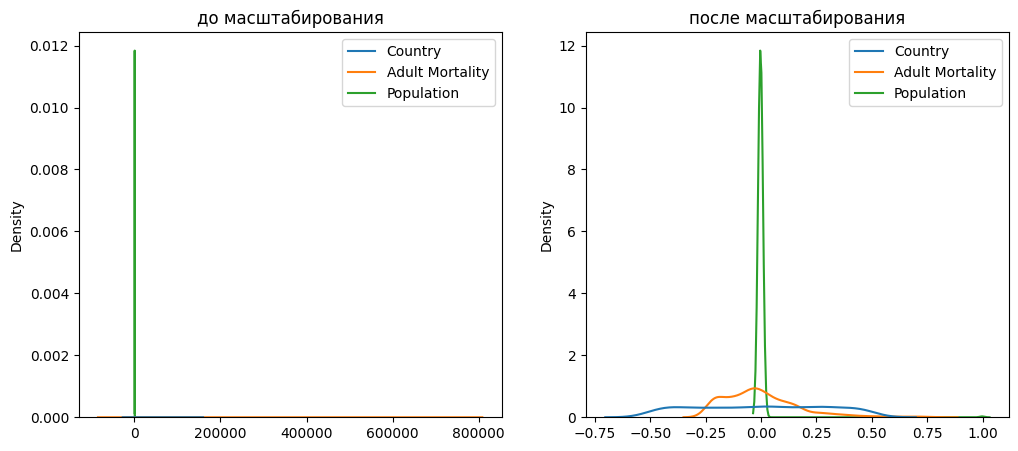

In [265]:
draw_kde(x_col_list, data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

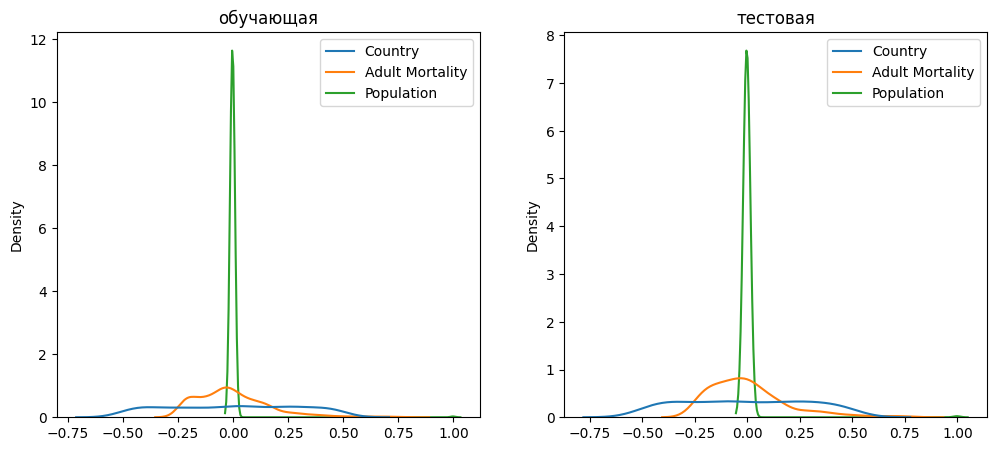

In [266]:
draw_kde(x_col_list, data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax масштабирование

In [267]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,Population
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,0.500931,0.145871,0.232049,0.020459,0.252180,0.036685,0.795505,0.838903,0.382567,0.046483,0.002411
std,0.294441,0.353083,0.173278,0.075316,0.225376,0.092528,0.264319,0.233994,0.168434,0.096045,0.049058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248120,0.000000,0.105263,0.000625,0.044793,0.001989,0.742268,0.812500,0.268864,0.003880,0.000000
50%,0.503759,0.000000,0.204986,0.001875,0.209406,0.007653,0.896907,0.937500,0.373626,0.013327,0.000000
75%,0.751880,0.000000,0.315097,0.014375,0.409574,0.026825,0.969072,0.979167,0.494139,0.039470,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [268]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

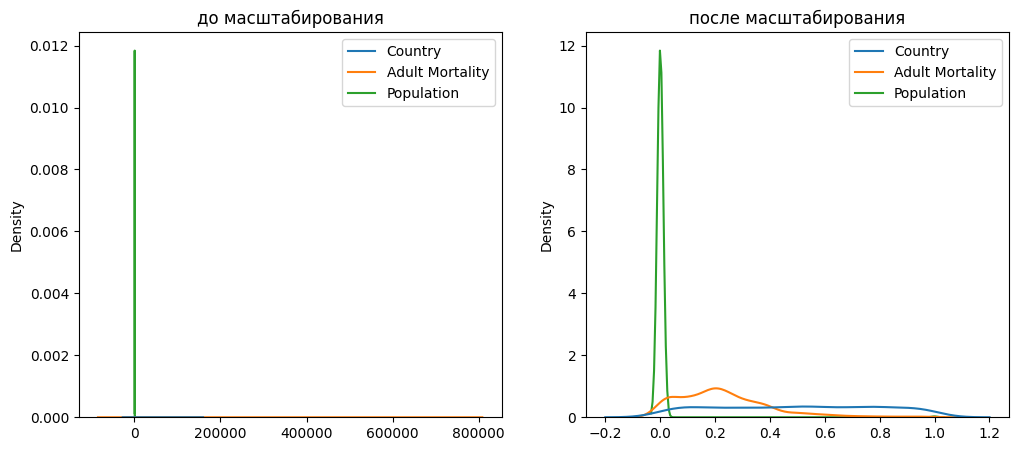

In [269]:
draw_kde(x_col_list, data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

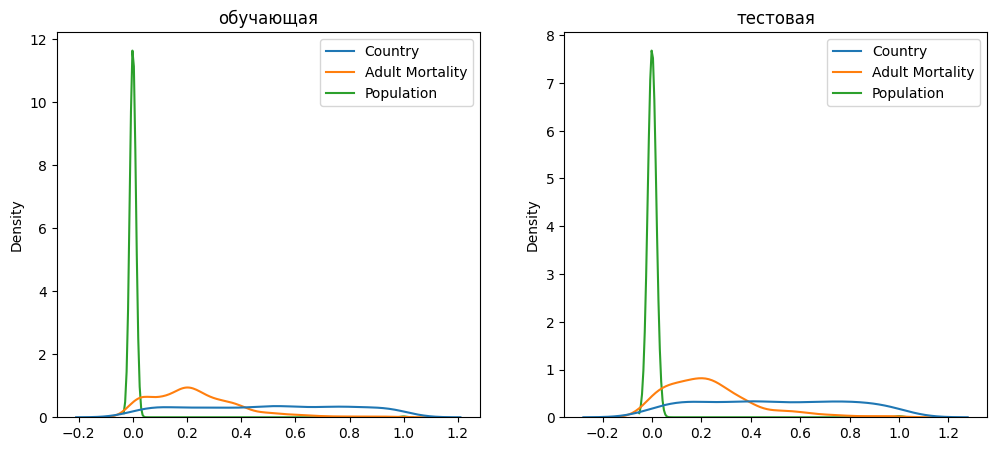

In [270]:
draw_kde(x_col_list, data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

## Обработка выбросов

In [271]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

In [272]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [273]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')

    return lower_boundary, upper_boundary

### Удаление выбросов

Воспользуемся методом OutlierBoundaryType.SIGMA:

<ipython-input-271-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


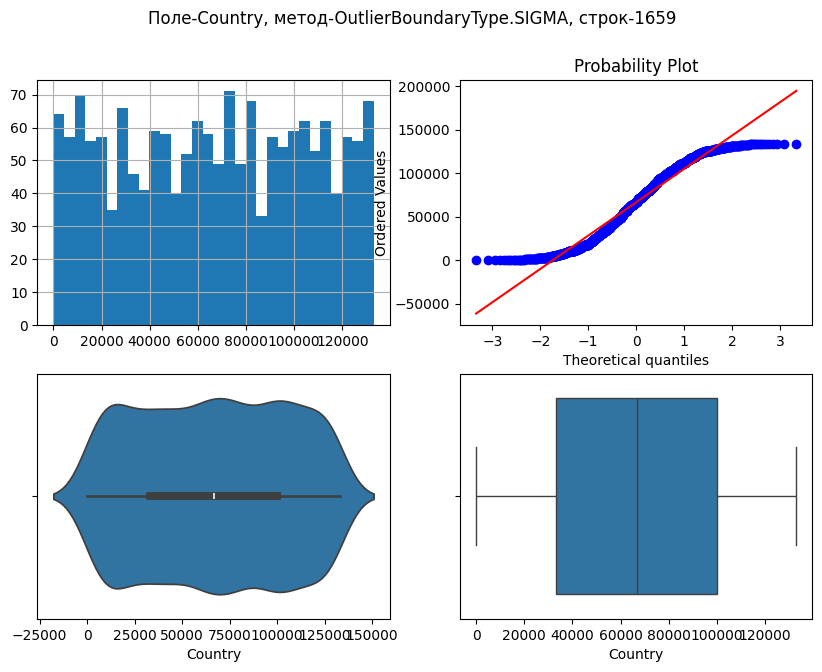

<ipython-input-271-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


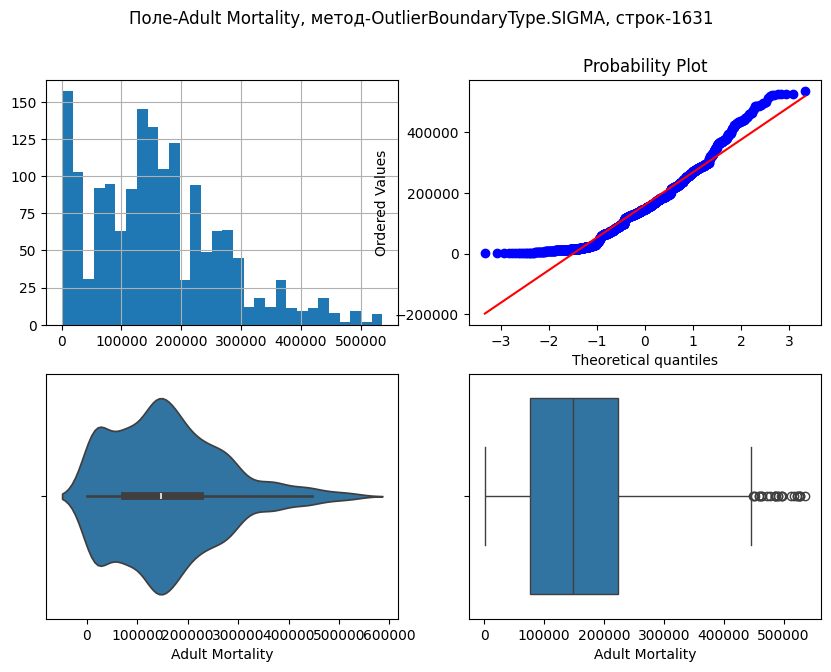

<ipython-input-271-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


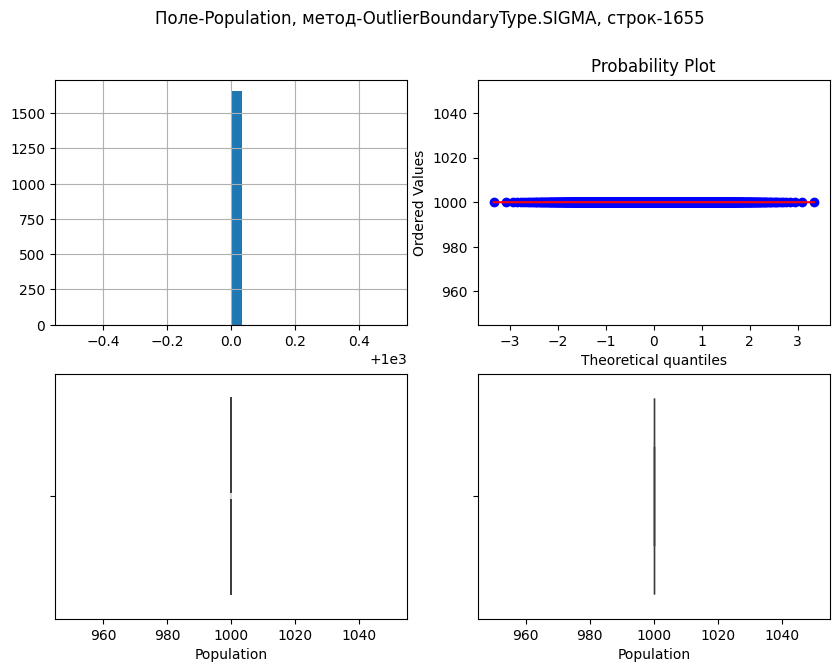

In [274]:
for col in x_col_list:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, OutlierBoundaryType.SIGMA)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True,
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, OutlierBoundaryType.SIGMA, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### Замена выбросов

Проведём замену выбросов с помощью метода OutlierBoundaryType.SIGMA:

<ipython-input-271-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


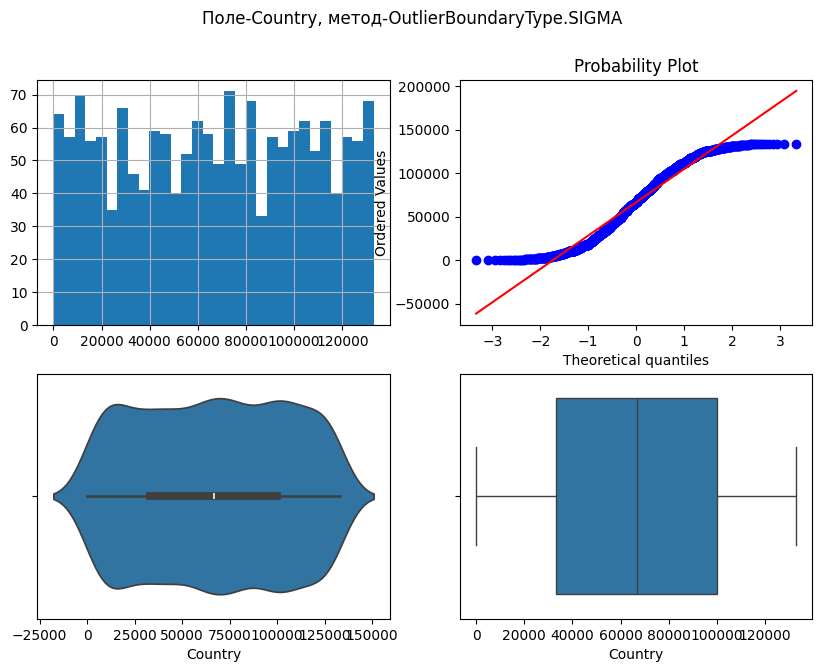

<ipython-input-271-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


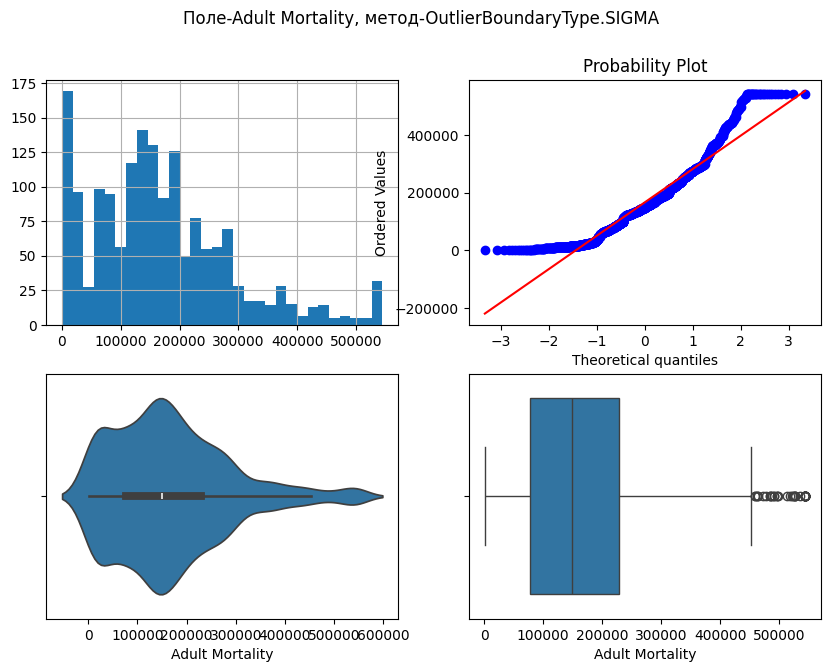

<ipython-input-271-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


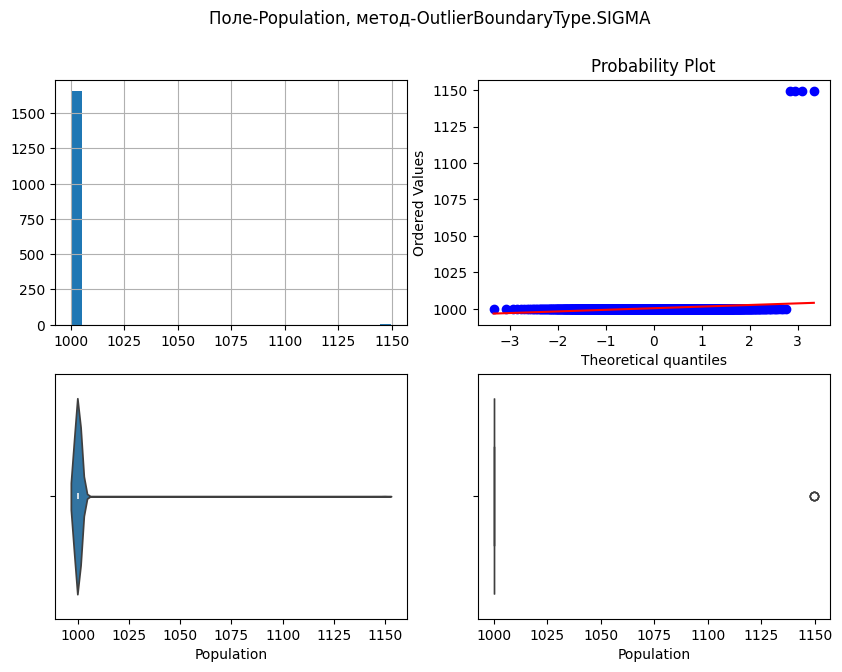

In [275]:
for col in x_col_list:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, OutlierBoundaryType.SIGMA)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary,
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, OutlierBoundaryType.SIGMA)
        diagnostic_plots(data, col, title)

## Отбор признаков

### Метод фильтрации (filter)

Воспользуемся методом "Удаление константных и псевдоконстантных (почти константных) признаков".

Известно, что в данном датасете `Status` - практически константный признак.

In [276]:
data.Status.unique()

array([0, 1])

С помощью VarianceThreshold попробуем обнаружить больше таких признаков:

In [277]:
from sklearn.feature_selection import VarianceThreshold

In [278]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(data)
# Значения дисперсий для каждого признака
selector.variances_

array([1.53262887e+09, 1.24592656e-01, 1.29520983e+01, 1.43191843e+10,
       1.45126904e+04, 1.61925703e+07, 3.07627889e+12, 6.56956844e+08,
       5.04301843e+08, 5.28279816e+06, 1.30926461e+14, 5.38206722e+01])

Удалим константные и псевдоконстантные признаки:

In [279]:
selector.transform(data)

array([[0.00000000e+00, 6.00000000e+00, 2.63000000e+05, ...,
        8.16000000e+03, 5.84259000e+05, 1.00000000e+03],
       [0.00000000e+00, 3.00000000e+00, 2.71000000e+05, ...,
        8.18000000e+03, 6.12696000e+05, 1.00000000e+03],
       [0.00000000e+00, 3.00000000e+00, 2.68000000e+05, ...,
        8.13000000e+03, 6.31744000e+05, 1.00000000e+03],
       ...,
       [1.33000000e+05, 1.00000000e+00, 7.30000000e+04, ...,
        6.53000000e+03, 5.73480000e+04, 1.00000000e+03],
       [1.33000000e+05, 1.00000000e+00, 5.43858903e+05, ...,
        6.16000000e+03, 5.48587000e+05, 1.00000000e+03],
       [1.33000000e+05, 2.00000000e+00, 5.43858903e+05, ...,
        7.10000000e+03, 5.47358000e+05, 1.00000000e+03]])

### Метод обертывания (wrapper)

Будем использовать алгоритм полного перебора.

In [280]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [281]:
data.dtypes

Country                   float64
Status                      int64
Life expectancy             int64
Adult Mortality           float64
infant deaths               int64
Alcohol                     int64
percentage expenditure      int64
Hepatitis B                 int64
Polio                       int64
Total expenditure           int64
GDP                         int64
Population                float64
dtype: object

In [282]:
efs1 = EFS(knn,
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 550/550

Best accuracy score: 0.24
Best subset (indices): (0, 4, 8)
Best subset (corresponding names): ('Country', 'Alcohol', 'Total expenditure')


### Метод вложений (embedded)

Применим линейную регрессию:

In [283]:
from sklearn.linear_model import Lasso

In [284]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(data.columns.tolist(), e_ls1.coef_))

[('Country', -9.302941911729841e-07),
 ('Status', -0.0),
 ('Life expectancy', -7.787324223987675e-06),
 ('Adult Mortality', -0.0019761507807838767),
 ('infant deaths', 7.643988241298908e-05),
 ('Alcohol', -2.737654079451584e-07),
 ('percentage expenditure', 5.04530737362544e-06),
 ('Hepatitis B', 9.583827921725951e-06),
 ('Polio', -4.37937765585229e-05),
 ('Total expenditure', -1.0792975576429296e-08),
 ('GDP', -0.0)]

In [285]:
from sklearn.feature_selection import SelectFromModel

In [286]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(data.columns.tolist(), sel_e_ls1.get_support()))

[('Country', False),
 ('Status', False),
 ('Life expectancy', False),
 ('Adult Mortality', True),
 ('infant deaths', True),
 ('Alcohol', False),
 ('percentage expenditure', False),
 ('Hepatitis B', False),
 ('Polio', True),
 ('Total expenditure', False),
 ('GDP', False)]